In [1]:
import anndata
import umap
import xgboost
import numpy as np
import pandas as pd
from pathlib import Path
from tqdm import tqdm
import pickle
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from IPython.display import display, Image, HTML
import mlflow

genes = ["CTNNB1", "JUND", "CD320", "IFI6"]
levels = ["0", "0.5", "1.0"]
data_dir = "/data/gene_perturbation_colon_epithelial_scGPT_with_binning_1"
file_pattern = data_dir + "/perturbation_experiment_{gene}_level_{level}"
base_fname = file_pattern.format(gene = "JUND", level = "1.0")
base_embeddings = np.load(f"{base_fname}.embeddings.npy")
adata = anndata.read_h5ad(f"{base_fname}.h5ad")
base_df = adata.obs[["tissue", "cell_type", "disease"]].copy()
base_df.sample(5)

,tissue,cell_type,disease
cell_id,,,
H197396_N1-ATCTGCCGTTCAGCGC,colon,stem cell,normal
H197396_N1-TCGGGACGTGGCGAAT,colon,epithelial cell,normal
N114902_N-AGTTGGTTCTCTGAGA,colon,enterocyte,Crohn disease
N110204_E-TACAACGCAAATGAGT,colonic epithelium,enterocyte,Crohn disease
N104689_N2-CGACCTTCACGCATCG,right colon,goblet cell,Crohn disease


In [2]:
! ls -lh {data_dir}

total 8.7G
-rw-r--r-- 1 nobody nogroup 191M May  2 11:33 perturbation_experiment_CD320_level_0.5.embeddings.npy
-rw-r--r-- 1 nobody nogroup  58M May  2 11:33 perturbation_experiment_CD320_level_0.5.h5ad
-rw-r--r-- 1 nobody nogroup 191M May  2 11:33 perturbation_experiment_CD320_level_0.embeddings.npy
-rw-r--r-- 1 nobody nogroup  58M May  2 11:33 perturbation_experiment_CD320_level_0.h5ad
-rw-r--r-- 1 nobody nogroup 191M May  2 11:33 perturbation_experiment_CD320_level_1.0.embeddings.npy
-rw-r--r-- 1 nobody nogroup 326M May  2 11:33 perturbation_experiment_CD320_level_1.0.h5ad
-rw-r--r-- 1 nobody nogroup 191M May  2 11:33 perturbation_experiment_CD320_level_5.0.embeddings.npy
-rw-r--r-- 1 nobody nogroup  58M May  2 11:33 perturbation_experiment_CD320_level_5.0.h5ad
-rw-r--r-- 1 nobody nogroup 191M May  2 11:34 perturbation_experiment_CTNNB1_level_0.5.embeddings.npy
-rw-r--r-- 1 nobody nogroup  58M May  2 11:33 perturbation_experiment_CTNNB1_level_0.5.h5ad
-rw-r--r-- 1 nobody nogroup 191

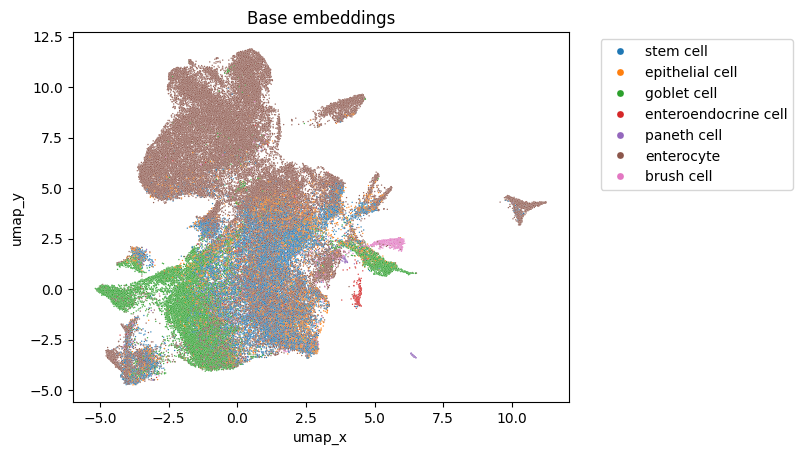

In [3]:
if not "umap_x" in base_df.columns:
    base_df[["umap_x", "umap_y"]] = umap.UMAP().fit_transform(base_embeddings)
sns.scatterplot(data = base_df, x = "umap_x", y = "umap_y", hue = "cell_type", s=1);
plt.title("Base embeddings")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize=10,  markerscale=5);

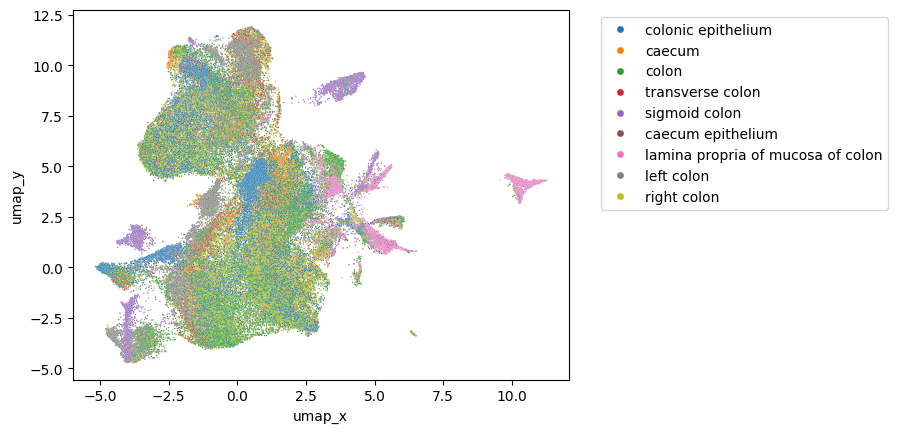

In [4]:
sns.scatterplot(data = base_df, x = "umap_x", y = "umap_y", hue = "tissue", s=1);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize=10,  markerscale=5);

In [5]:
# import cross_validation score:
import xgboost
from sklearn.model_selection import cross_val_score
x = base_embeddings
y = pd.Categorical(base_df["disease"]).codes
model = xgboost.XGBClassifier()
scores = cross_val_score(model, x, y, cv=5, scoring="accuracy")
print(scores)
print(f"Accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

[0.68677779 0.74746907 0.7586154  0.81050263 0.71810605]
Accuracy: 0.74 (+/- 0.08)


In [6]:
xgb_model = model.fit(x, y)
with open(f"crohn_classifier2.xgboost.pkl", "wb") as f:
    pickle.dump(xgb_model, f)

In [7]:
base_df[]

SyntaxError: invalid syntax (258619762.py, line 1)